<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%82%B0%ED%8F%AC_%EA%B2%BD%EA%B3%84%EB%A9%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

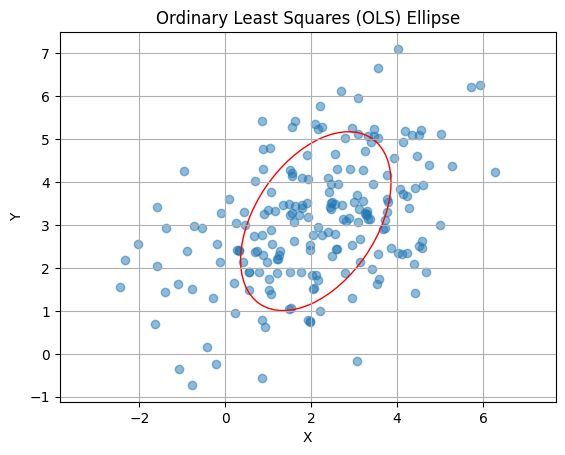

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 가상의 데이터 생성
np.random.seed(0)
num_samples = 200
mean = [2, 3]
cov_matrix = [[3, 1], [1, 2]]
data = np.random.multivariate_normal(mean, cov_matrix, num_samples)

# 평균과 공분산 계산
data_mean = np.mean(data, axis=0)
data_cov = np.cov(data, rowvar=False)

# OLS 타원의 매개변수 계산
eigenvalues, eigenvectors = np.linalg.eig(data_cov)
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
angle = 90 - angle  # Adjust angle for matplotlib
major_axis_len = 2 * np.sqrt(chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues[0])
minor_axis_len = 2 * np.sqrt(chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues[1])

# 타원 중심
ellipse_center = data_mean

# 타원 그리기
ellipse = plt.matplotlib.patches.Ellipse(ellipse_center, major_axis_len/2, minor_axis_len/2, angle=angle, fill=False, color='red')

# 데이터와 타원 그리기
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.gca().add_patch(ellipse)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ordinary Least Squares (OLS) Ellipse')
plt.axis('equal')
plt.grid(True)
plt.show()


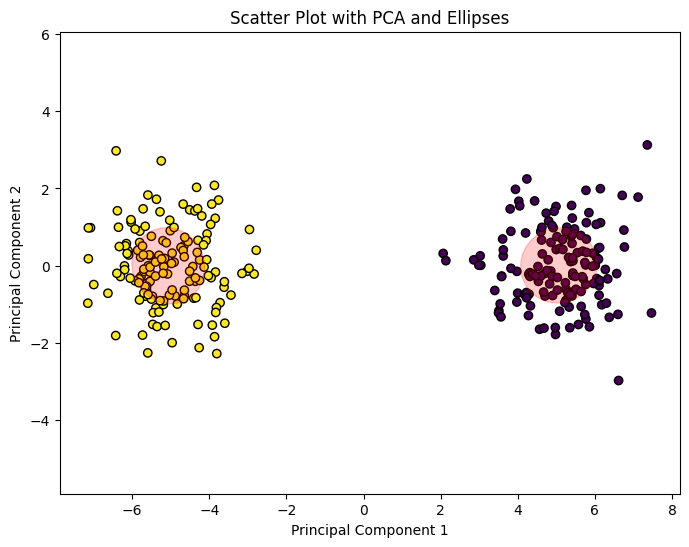

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# 가상의 데이터 생성
n_samples = 300
n_features = 2
n_clusters = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 데이터 산포 경계면 그리기
def plot_ellipse(ax, mean, cov, color, alpha=0.2):
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width = 2 * np.sqrt(eigenvalues[0])
    height = 2 * np.sqrt(eigenvalues[1])

    ell = Ellipse(mean, width, height, angle=angle, color=color, alpha=alpha)
    ax.add_artist(ell)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot with PCA and Ellipses')
plt.axis('equal')

for i in range(n_clusters):
    cluster_data = X_pca[y == i]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_cov = np.cov(cluster_data, rowvar=False)
    plot_ellipse(plt.gca(), cluster_mean, cluster_cov, color='red')

plt.show()
